# Linear Regression in NumPy
Now you already know that in supervised learning both input and output is given for tranning and job of algorithm is to find function that maps input to output. When output is real or continous value than it is called regression.Examples:

* Predicting height of a person given weight.(here height is continous it can take any positive value eg 183.28cm).
* Predicting house price given features of house.(here price is contionus it can take any positive value eg 2220.56$).
* Predicting stock value.

In linear regression, the relationships(mappings) are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.So what is linear predictor function? It is a fancy name given to the function of form:

![](images/Linear_predictor_function.svg)

where 
* i is a datapoint(consisting of p variables)
* beta<sub>0</sub>,beta<sub>1</sub>... are the parameter of function 
* x<sub>in</sub> is n<sup>th</sup> variable of i<sup>th</sup> data instant

So in simple term f(i) returns predicted value of the dependent variable for a given input data instant. In height prediction problem weight is given as input to f and it will returns the predicted height.

### Data set
The data set for linear regression consists of independent variable(or features) and continous dependent variable(or target). Throughout this workshop we will use convension that X will hold features and numpy array Y will hold continous target variable.

Dataset are divided into three parts:
* Traning data
   
   With this data, the model is trained. Traning model means estimating the unknown model parameters. In linear regression training model means estimating the values of beta<sub>0</sub>,beta<sub>1</sub>...
   
   
* Validation data
    
    With this data, hyper-parameter of a model is tuned. Hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training. Don't worry much about hyper-parameter now we will see it later.
    
    
* Testing data
    
    We use this data to assess the performance of a fully-trained model.
    

Throughout this workshop we will use name X_train and Y_train for traning data, X_val and Y_val for validation, and X_test and Y_test for testing data.

**So how do we divide the X and Y into (X_train,Y_train),(X_val,Y_val), and (X_test,Y_test)?**


There is no hard and fast rule for this. It completely depends upon the amount of data you have. General rule of thumb is to divide into 60% 20% 20%.

**Why do we need both validation and test data? Why not tune hyper-parameter in test data?**

The reason is, to find out the performance of model we must test its performance in compeletly unseen data. If we use same data set for both hyper-parameter tuning and testing then the data set used for testing the model is already seen by the model during hyper-parameter tuning. Because of this we cannot have clear idea about how is our model performing. 

### Traning model
Traning model means estimating the unknown model parameters. So how do we estimate the unknown model parameters? Initially the parameters are initilized randomly. The error value on tranning data is calculated and model parameter are slighlty changed in a direction that reduces the error. The process is continued for some number of iterations until good result is obtained. The algorithm used for traning model is called optimization algoritms. 

###### Gradient Descent Optimization Algorithm
Gradient descent is the most popular optimization strategy, used in machine learning and deep learning. Gradient Descent algorithm minimizes the error function or cost function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

![](images/gradient_descent.png)

**Update Equation**
![](images/gradient_descent_equation.png)

Where,
* α is learning rate
* w is weight or parameters of model
* Δ is gradient operator
* J(w) is cost function


###### Cost Function
As name suggest cost function is a function that you want to minimize. Smaller the value of cost function better the performance of the model. One most used cost function for regression is MSE(mean squared error).


![](images/MSE.png)


###### Learning Rate
Learning rate is a hyper-parameter that controls how much we are adjusting the parametes of our model with respect the cost function gradient in each iteration. High learning rate produce larger adjustment in parameters and small learning rate produce small adjustment in parameters in each iteration. Large learning rate will converge faster but it has higher risk of divergence while small learning rate converge slower and has lower risk of divergence.

**How to find good learning rate?**


The best way to find good learning rate is to try various and find out what value works the best.


![](images/largelr_vs_smalllr.png)


Depending upon the number of samples of tranning instance used for computing gradient of the cost function gradient descent algorithm is of three types:

* Batch Gradient Descent
    
    Here gradient is computed using entire tranning set. If we have large dataset,then using Batch Gradient Descent can be very slow as we are only taking a single step after computing gradient from large dataset set.
    

* Stochastic Gradient Descent
    
    Here gradient is computed using single tranning example. As gradient is computed using only single tranning example, we will not get exact value of gradient.Because of this gradients obtained by this method is very noisy.
    

* MINI-BATCH GRADIENT DESCENT

    It is compromise between Batch Gradient Descent and Stochastic Gradient Descent. Here MINI_BATCH_SIZE number of tranning example is used to compute gradient. MINI_BATCH_SIZE is a hyper-parameter and generally in practise value between 32-512 is used. 
    
    
![](images/Batch_vs_mini_vs_Sto.png)

**Because of time constrain we will not disscuss details of gradient descent algorithm in this workshop.For detail please refer to [http://ruder.io/optimizing-gradient-descent/](http://ruder.io/optimizing-gradient-descent/)**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# An example of linear regression in numpy
# Just for this example lets create our own dataset
N=1000 #total number of data instances
X=np.random.rand(N) #Feature 
Y=200*X-100 #Here target variable is 200 times of feature variable-100
#Real world data is not perfect lets add some gussian noise
Y=Y+np.random.randn(N)*20
#Lets have a loot at our data
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()
#Lets divide the data 
#Here we do not have any hyperparameter so lets divide the data into tranning and testing with proportion 0.8 and 0.2
X_train=X[0:int(N*0.8)]
Y_train=Y[0:int(N*0.8)]
X_test=X[int(N*0.8):]
Y_test=Y[int(N*0.8):]
print('Traning Size: ',X_train.shape[0])
print('Testing Size: ',X_test.shape[0])

<Figure size 640x480 with 1 Axes>

Traning Size:  800
Testing Size:  200


In [2]:
class Linear_Regression:
    def __init__(self):
        self.W=None # parameter of model or weight of model
    
    #lets define mse cost function
    @staticmethod
    def MSE(Y,Y_pred):
        return np.sum((Y-Y_pred)**2)/(len(Y))
    
    
    def predict(self,X):
        return X*self.W[0]+self.W[1]
    
    
    #lets define gradient function for mse cost function
    def mse_gradient(self,X,Y):
        pred_Y=self.predict(X)
        grad_w1=np.sum((2/len(X))*(pred_Y-Y)*(X))
        grad_w2=np.sum((2/len(X))*(pred_Y-Y))
        return np.array([grad_w1,grad_w2])
    
    #return list of mini_batches
    @staticmethod
    def mini_batches(X,Y,size):
        if size>=len(X):
            return [(X,Y)]
        else:
            mini_batches=[]
            for i in range(int(len(X)/size)):
                mini_batches.append((X[i*size:(i+1)*size],Y[i*size:(i+1)*size]))
            if len(X)%size!=0:
                mini_batches.append((X[(i+1)*size:],Y[(i+1)*size:]))
            return mini_batches
    
    #function that trains the model
    def train(self,X_train,Y_train,n_epoch=10,mini_batch_size=64,learning_rate=0.01):
        self.W=np.random.randn(2)
        for i in range(n_epoch):
            print('Epoch number: ',i+1)
            for X,Y in Linear_Regression.mini_batches(X_train,Y_train,mini_batch_size):
                self.W=self.W-learning_rate*self.mse_gradient(X,Y)
            print('Cost: ',Linear_Regression.MSE(Y_train,self.predict(X_train)))

In [3]:
lin_r=Linear_Regression()

In [4]:
lin_r.train(X_train,Y_train,n_epoch=50,mini_batch_size=128,learning_rate=0.07)

Epoch number:  1
Cost:  3174.1302539685835
Epoch number:  2
Cost:  2855.129008894262
Epoch number:  3
Cost:  2573.795237209174
Epoch number:  4
Cost:  2324.7507477060262
Epoch number:  5
Cost:  2104.62322882164
Epoch number:  6
Cost:  1910.1671739115245
Epoch number:  7
Cost:  1738.4172523223672
Epoch number:  8
Cost:  1586.729256610177
Epoch number:  9
Cost:  1452.7618236923079
Epoch number:  10
Cost:  1334.4456424770556
Epoch number:  11
Cost:  1229.9527460274858
Epoch number:  12
Cost:  1137.668572586171
Epoch number:  13
Cost:  1056.167100855071
Epoch number:  14
Cost:  984.1888456168384
Epoch number:  15
Cost:  920.6214129978742
Epoch number:  16
Cost:  864.4823241005308
Epoch number:  17
Cost:  814.9038438623232
Epoch number:  18
Cost:  771.1195813849647
Epoch number:  19
Cost:  732.4526549666556
Epoch number:  20
Cost:  698.3052391459958
Epoch number:  21
Cost:  668.149332383107
Epoch number:  22
Cost:  641.5186028436881
Epoch number:  23
Cost:  618.0011863945923
Epoch number:  

MSE in test set:  385.9613990410202


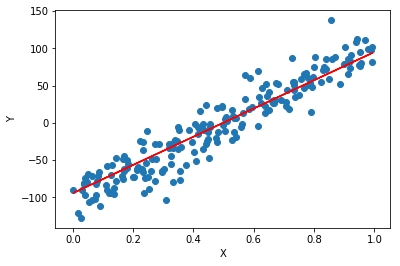

In [5]:
#lets see how it did in test set
Y_test_pre=lin_r.predict(X_test)
print('MSE in test set: ',Linear_Regression.MSE(Y_test,Y_test_pre))
#lets plot the graph
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_test_pre,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
#lets see the final parameters
lin_r.W

array([189.77182549, -94.6262307 ])